In [1]:
%load_ext autoreload

In [2]:
%autoreload

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.losses import MeanSquaredError

from dataset import DirImagesDataset
from vgg import VggRealizer

2023-07-05 00:38:44.301864: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 00:38:44.757726: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
minecraft_dataset = DirImagesDataset(
    '../data/minecraft_images',
    # cache_path='.cache/minecraft_dataset',
    target=0.0,
    size=256,
)

loading images from dataset


  0%|          | 0/10405 [00:00<?, ?it/s]

100%|██████████| 10405/10405 [00:11<00:00, 888.36it/s]


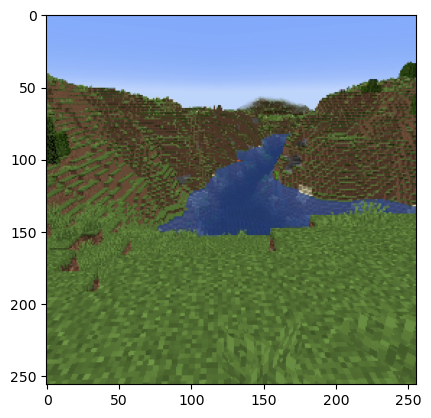

In [9]:
mc_image, _ = minecraft_dataset[random.randint(0, len(minecraft_dataset)-1)]
plt.imshow(mc_image+0.5)

In [10]:
vgg_realizer = VggRealizer()

2023-07-05 00:39:09.590906: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-05 00:39:09.591462: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-05 00:39:09.591562: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [19]:
real_image = vgg_realizer(real_image[0], num_steps=5000)

 13%|█▎        | 646/5000 [02:16<15:36,  4.65it/s, Loss: 1.0671026706695557]libpng warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'dmnd': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'dmdd': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'vued': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'view': ICC profile tag 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


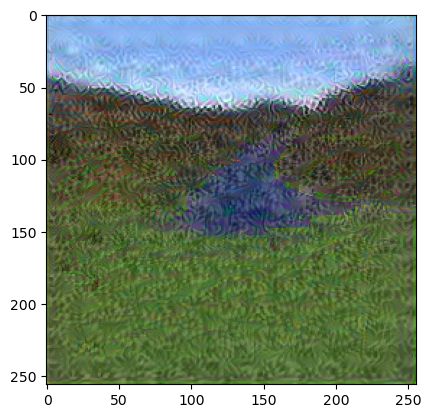

In [20]:
plt.imshow(real_image[0]+0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


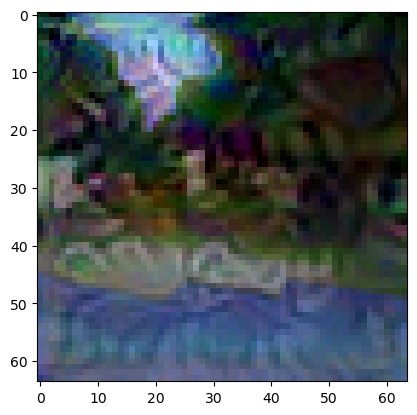

In [ ]:
plt.imshow(real_image[0]+0.5)

In [65]:
import cv2
cv2.imwrite('img.png', ((realized_image[0, ..., ::-1]+0.5)*255).astype(np.uint8))

True